In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer


In [29]:
subsaharan_df=pd.read_csv('data/subsaharan-africa.csv')

lowest_countries=['Chad', 'Niger', 'Burkina Faso', 'South Sudan', 'Central African Republic', 'Congo', 'Burundi', 'Malaw',  'Sierra Leone']

lowest_df=subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

In [30]:
missing_gdp_rows = lowest_df[lowest_df['gdp_growth'].isna()][['Entity', 'Year']]

print(missing_gdp_rows)


          Entity  Year
822  South Sudan  2016
823  South Sudan  2017
824  South Sudan  2018
825  South Sudan  2019
826  South Sudan  2020


In [31]:
#Filling in missing GDP Growth values for Congo

missing_gdp_rows = lowest_df[lowest_df['gdp_growth'].isna()][['Entity', 'Year']]

gdp_growth_values=[7.575980395, 3.80260189, 4.58187006, 0.8132640, 3.476631621, 7.755758978, 7.986238363, -6.613994804, 6.306375956,11.63728886, 9.931265431, 2.205919363, 9.947153143, -0.712434452, 6.646065409, 	0.415193061, -8.685243439, -5.594773719, -2.304317801 , 1.124477074, -6.267777996
]

congo_missing_rows = lowest_df[(lowest_df['Entity'] == 'Congo') & (lowest_df['gdp_growth'].isna())].index

if len(congo_missing_rows) == len(gdp_growth_values):
    lowest_df.loc[congo_missing_rows, 'gdp_growth'] = gdp_growth_values
else:
    print("Error: Number of missing rows for Congo does not match the number of provided values.")


Error: Number of missing rows for Congo does not match the number of provided values.


In [32]:
# Check if there are any missing values left
print(lowest_df[(lowest_df['Entity'] == 'Congo') & (lowest_df['gdp_growth'].isna())])


Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, Entity, Year, Access to electricity (% of population), Access to clean fuels for cooking, Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US $), Renewable energy share in the total final energy consumption (%), Electricity from fossil fuels (TWh), Electricity from nuclear (TWh), Electricity from renewables (TWh), Low-carbon electricity (% electricity), Primary energy consumption per capita (kWh/person), Energy intensity level of primary energy (MJ/$2017 PPP GDP), Value_co2_emissions_kt_by_country, Renewables (% equivalent primary energy), gdp_growth, gdp_per_capita, Density\n(P/Km2), Land Area(Km2), Latitude, Longitude]
Index: []

[0 rows x 23 columns]


In [33]:

#Dropping South Sudan completely due to missing data

lowest_df = lowest_df[lowest_df['Entity'] != 'South Sudan']

lowest_df.isna().sum()

Unnamed: 0.1                                                          0
Unnamed: 0                                                            0
Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                  0
Financial flows to developing countries (US $)                       68
Renewable energy share in the total final energy consumption (%)      7
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                        0
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)              

In [34]:
#Filling in GDP per capita values for Congo

missing_gdp = lowest_df[lowest_df['gdp_per_capita'].isna()][['Entity', 'Year']]

gdp_values=[859.4400125,	910.8697108,	1023.088496,	1314.411281,	1810.588942,	2116.868943,	2219.912307,	2848.653163,	2283.949872,	2962.762481,	3415.062374,	3753.860928,	3719.651036, 3623.827057,	2455.340858,	2107.518618,	2227.732609, 2715.260418,	2508.940444,	2011.28344]
congo_missing_gdp = lowest_df[(lowest_df['Entity'] == 'Congo') & (lowest_df['gdp_per_capita'].isna())].index

if len(congo_missing_rows) == len(gdp_growth_values):
    # Assign the values from the list to the missing gdp_growth rows for Congo
    lowest_df.loc[congo_missing_gdp, 'gdp_per_capita'] = gdp_growth_values
else:
    print("Error: Number of missing rows for Congo does not match the number of provided values.")


Error: Number of missing rows for Congo does not match the number of provided values.


In [35]:
print(lowest_df[(lowest_df['Entity'] == 'Congo') & (lowest_df['gdp_per_capita'].isna())])


Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, Entity, Year, Access to electricity (% of population), Access to clean fuels for cooking, Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US $), Renewable energy share in the total final energy consumption (%), Electricity from fossil fuels (TWh), Electricity from nuclear (TWh), Electricity from renewables (TWh), Low-carbon electricity (% electricity), Primary energy consumption per capita (kWh/person), Energy intensity level of primary energy (MJ/$2017 PPP GDP), Value_co2_emissions_kt_by_country, Renewables (% equivalent primary energy), gdp_growth, gdp_per_capita, Density\n(P/Km2), Land Area(Km2), Latitude, Longitude]
Index: []

[0 rows x 23 columns]


In [36]:
lowest_df.isna().sum()

Unnamed: 0.1                                                          0
Unnamed: 0                                                            0
Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                  0
Financial flows to developing countries (US $)                       68
Renewable energy share in the total final energy consumption (%)      7
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                        0
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)              

In [37]:
missing_target = lowest_df[lowest_df['Renewable energy share in the total final energy consumption (%)'].isna()][['Entity', 'Year']]
print(missing_target)

                       Entity  Year
83               Burkina Faso  2020
104                   Burundi  2020
146  Central African Republic  2020
167                      Chad  2020
209                     Congo  2020
650                     Niger  2020
776              Sierra Leone  2020


In [38]:
countries_with_missing_values = ['Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Congo', 'Niger', 'Sierra Leone']

for country in countries_with_missing_values:
    country_data = lowest_df[(lowest_df['Entity'] == country) & (lowest_df['Year'] < 2020)]
    
    mean_renewable_share = country_data['Renewable energy share in the total final energy consumption (%)'].mean()
    
    lowest_df.loc[(lowest_df['Entity'] == country) & (lowest_df['Year'] == 2020), 'Renewable energy share in the total final energy consumption (%)'] = mean_renewable_share


print(lowest_df[(lowest_df['Entity'].isin(countries_with_missing_values)) & (lowest_df['Year'] == 2020)][['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)']])


                       Entity  Year  \
83               Burkina Faso  2020   
104                   Burundi  2020   
146  Central African Republic  2020   
167                      Chad  2020   
209                     Congo  2020   
650                     Niger  2020   
776              Sierra Leone  2020   

     Renewable energy share in the total final energy consumption (%)  
83                                             78.3460                 
104                                            92.4315                 
146                                            91.8745                 
167                                            81.3905                 
209                                            63.7135                 
650                                            82.9415                 
776                                            82.0955                 


In [39]:

lowest_df = lowest_df.drop(columns=['Renewables (% equivalent primary energy)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Latitude', 'Longitude', 'Land Area(Km2)','Financial flows to developing countries (US $)'])

lowest_df=lowest_df.drop(columns=['Density\\n(P/Km2)'])

lowest_df.columns
lowest_df.isna().sum()

Unnamed: 0.1                                                        0
Unnamed: 0                                                          0
Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
gdp_growth                                                          0
gdp_per_capita      

In [40]:
lowest_df.to_csv("data/lowest_df_cleaned.csv")

At this point data is cleaned !

In [41]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Apply One-Hot Encoding to the 'Entity' column
entity_encoded = one_hot_encoder.fit_transform(lowest_df[['Entity']])

# Convert to DataFrame and set the same index as the original DataFrame
entity_encoded_df = pd.DataFrame(entity_encoded, columns=one_hot_encoder.get_feature_names_out(['Entity']))
entity_encoded_df.index = lowest_df.index  # Align indices

# Drop the original 'Entity' column and concatenate the encoded columns
lowest_df_encoded = pd.concat([lowest_df.drop('Entity', axis=1), entity_encoded_df], axis=1)

# Check if the encoding has been applied correctly
print(lowest_df_encoded.head())


    Unnamed: 0.1  Unnamed: 0  Year  Access to electricity (% of population)  \
63            63          63  2000                                 9.075020   
64            64          64  2001                                 9.521352   
65            65          65  2002                                 9.960099   
66            66          66  2003                                11.400000   
67            67          67  2004                                10.824239   

    Access to clean fuels for cooking  \
63                                2.7   
64                                2.9   
65                                3.1   
66                                3.4   
67                                3.7   

    Renewable-electricity-generating-capacity-per-capita  \
63                                               2.80      
64                                               2.72      
65                                               2.64      
66                                    

In [42]:
# Separate features (X) and target (y)
X = lowest_df_encoded.drop('Renewable energy share in the total final energy consumption (%)', axis=1)
y = lowest_df_encoded['Renewable energy share in the total final energy consumption (%)']

# Verify the shapes of X and y
print(X.shape, y.shape)


(147, 20) (147,)


In [43]:
lowest_df.isna().sum()


Unnamed: 0.1                                                        0
Unnamed: 0                                                          0
Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
gdp_growth                                                          0
gdp_per_capita      

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the split datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(117, 20) (30, 20) (117,) (30,)


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print out the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 8.165762193206593
Root Mean Squared Error (RMSE): 2.857579778974962
R² Score: 0.9065651285777239


In [47]:
import pandas as pd

subsaharan_df=pd.read_csv('data/subsaharan-africa.csv')

missing_gdp_rows = subsaharan_df[subsaharan_df['gdp_growth'].isna()][['Entity', 'Year']]

gdp_growth_values=[7.575980395, 3.80260189, 4.58187006, 0.8132640, 3.476631621, 7.755758978, 7.986238363, -6.613994804, 6.306375956,11.63728886, 9.931265431, 2.205919363, 9.947153143, -0.712434452, 6.646065409, 	0.415193061, -8.685243439, -5.594773719, -2.304317801 , 1.124477074, -6.267777996
]

congo_missing_rows = subsaharan_df[(subsaharan_df['Entity'] == 'Congo') & (subsaharan_df['gdp_growth'].isna())].index

if len(congo_missing_rows) == len(gdp_growth_values):
    subsaharan_df.loc[congo_missing_rows, 'gdp_growth'] = gdp_growth_values
else:
    print("Error: Number of missing rows for Congo does not match the number of provided values.")


missing_gdp = subsaharan_df[subsaharan_df['gdp_per_capita'].isna()][['Entity', 'Year']]

gdp_values=[859.4400125,	910.8697108,	1023.088496,	1314.411281,	1810.588942,	2116.868943,	2219.912307,	2848.653163,	2283.949872,	2962.762481,	3415.062374,	3753.860928,	3719.651036, 3623.827057,	2455.340858,	2107.518618,	2227.732609, 2715.260418,	2508.940444,	2011.28344]
congo_missing_gdp = subsaharan_df[(subsaharan_df['Entity'] == 'Congo') & (subsaharan_df['gdp_per_capita'].isna())].index

if len(congo_missing_rows) == len(gdp_growth_values):
    # Assign the values from the list to the missing gdp_growth rows for Congo
    subsaharan_df.loc[congo_missing_gdp, 'gdp_per_capita'] = gdp_growth_values
else:
    print("Error: Number of missing rows for Congo does not match the number of provided values.")


subsaharan_df.to_csv('data/subsaharan-africa.csv')

Error: Number of missing rows for Congo does not match the number of provided values.
Error: Number of missing rows for Congo does not match the number of provided values.


In [48]:
subsaharan_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Entity', 'Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [49]:
lowest_df_cleaned=pd.read_csv('data/lowest_df_cleaned.csv')
lowest_df['Entity'].unique()

array(['Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
       'Congo', 'Niger', 'Sierra Leone'], dtype=object)

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Load the data
df = pd.read_csv('data/lowest_df_cleaned.csv')

# List of the five countries we are interested in
countries = ['Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Congo', 'Niger', 'Sierra Leone']

# Filter the dataframe for the five countries and select the relevant columns
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000)]

# Initialize a Plotly figure
fig = go.Figure()

# Define colors for each country
colors = {'Burkina Faso': 'blue', 'Burundi': 'green', 'Central African Republic': 'orange', 'Chad': 'purple', 'Congo': 'brown','Niger': 'brown', 'Sierra Leone':'yellow' }

# Degree of the polynomial (try different values for better fit)
degree = 2

# Iterate through each country and plot their low-carbon electricity share and predictions
for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data[r'Low-carbon electricity (% electricity)'].values  # Adjust column name as needed
    
    # Train the polynomial regression model
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)
    
    # Predict for the years starting from the last known year
    future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    y_pred = polynomial_model.predict(future_years)
    
    # Combine actual and predicted values for the known range
    predicted_full_series = np.concatenate([y, y_pred[len(X):]])  # Take historical y and append predicted for future
    
    # Plot the historical data
    fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)', marker=dict(color=colors[country])))
    
    # Plot the predicted data starting from the last known year
    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{country} (Predicted)', line=dict(color=colors[country], dash='dash')))

# Update the layout of the plot
fig.update_layout(
    title='Low-carbon electricity (% electricity)',
    xaxis_title='Year',
    yaxis_title='Low-carbon Electricity Share (%)',
    legend_title='Country',
    showlegend=True
)

# Show the plot
fig.show()


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

df = pd.read_csv('data/lowest_df_cleaned.csv')

df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000)]

degree = 2

for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data[r'Low-carbon electricity (% electricity)'].values  

    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)

    future_years = np.arange(X.min(), 2031).reshape(-1, 1)
    y_pred_full = polynomial_model.predict(future_years)
    
    y_pred_train = polynomial_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred_train))
    r2 = r2_score(y, y_pred_train)
    
    print(f"Country: {country}")
    print(f"  RMSE (up to latest known year): {rmse}")
    print(f"  R-squared (up to latest known year): {r2}")
    print("-" * 30)


Country: Burkina Faso
  RMSE (up to latest known year): 3.7335220710709955
  R-squared (up to latest known year): 0.5617214655079841
------------------------------
Country: Burundi
  RMSE (up to latest known year): 3.5016249053325805
  R-squared (up to latest known year): 0.9244281039853463
------------------------------
Country: Central African Republic
  RMSE (up to latest known year): 3.8761962123280105
  R-squared (up to latest known year): 0.803667089175959
------------------------------
Country: Chad
  RMSE (up to latest known year): 2.0486416792623627
  R-squared (up to latest known year): 0.701023161495422
------------------------------
Country: Congo
  RMSE (up to latest known year): 4.117204024192168
  R-squared (up to latest known year): 0.9706034923116006
------------------------------
Country: Niger
  RMSE (up to latest known year): 1.3693205772372645
  R-squared (up to latest known year): 0.8305778509366882
------------------------------
Country: Sierra Leone
  RMSE (up t

In [52]:
df=pd.read_csv('share-electricity-renewables.csv')



In [53]:
# TOP 5 COUNTRIES (Starting 2010)

import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

countries = ['China', 'United States', 'India', 'Japan', 'Germany']

# Filter the dataframe for the five countries and select the relevant columns
df_filtered = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000)]

# Create a list for the years we want to predict (2020 and 2031)
years_to_predict = np.array([2022, 2031]).reshape(-1, 1)

# Create an empty list to store the plot traces
plot_traces = []

# Define a list of colors for each country
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Iterate over the top five countries in the dataset
for idx, country in enumerate(df_filtered['Entity'].unique()):
    country_data = df_filtered[df_filtered['Entity'] == country]
    
    # Prepare the feature (year) and target (Renewable energy share)
    X = country_data[['Year']]
    y = country_data['Renewables - % electricity']
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model on the available data (years 2010 to 2019)
    model.fit(X, y)
    
    # Make predictions for the years 2020 and 2031
    predictions = model.predict(years_to_predict)
    
    # Create scatter plot for actual data (from 2010 to 2019)
    plot_traces.append(go.Scatter(
        x=country_data['Year'],
        y=y,
        mode='markers',
        marker=dict(color=colors[idx]),
        name=f'{country} Actual Data (Scatter)'
    ))

    # Create a line plot for actual data regression (from 2010 to 2019)
    y_pred = model.predict(X)
    plot_traces.append(go.Scatter(
        x=country_data['Year'],
        y=y_pred,
        mode='lines',
        line=dict(color=colors[idx]),
        name=f'{country} Regression Line'
    ))

    # Create a trace for predicted data (dashed line for predictions)
    plot_traces.append(go.Scatter(
        x=[2020, 2031],
        y=predictions,
        mode='lines',
        line=dict(dash='dash', color=colors[idx]),
        name=f'{country} Predicted Data'
    ))

    # Model evaluation (R² and MSE)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    print(f'{country} Model Performance:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print('--------------------------')

# Create the layout for the plot
layout = go.Layout(
    title='Renewable Energy Share Predictions (2020-2031) for Top 5 Countries with Regression (2010-2019)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Renewable Energy Share (%)'),
    template="plotly_white"
)

# Create the figure with the plot traces
fig = go.Figure(data=plot_traces, layout=layout)

# Show the plot
fig.show()


China Model Performance:
R-squared: 0.85
Mean Squared Error: 3.85
--------------------------
Germany Model Performance:
R-squared: 0.96
Mean Squared Error: 6.85
--------------------------
India Model Performance:
R-squared: 0.60
Mean Squared Error: 2.08
--------------------------
Japan Model Performance:
R-squared: 0.80
Mean Squared Error: 4.37
--------------------------
United States Model Performance:
R-squared: 0.90
Mean Squared Error: 2.25
--------------------------


c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature

In [54]:
df=pd.read_csv('data/lowest_df_cleaned.csv')
df.isna().sum()

df['Access to electricity (% of population)'].corr(df['gdp_per_capita'])
\


SyntaxError: incomplete input (3305331285.py, line 5)

In [57]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)', 'gdp_growth',
       'gdp_per_capita'],
      dtype='object')

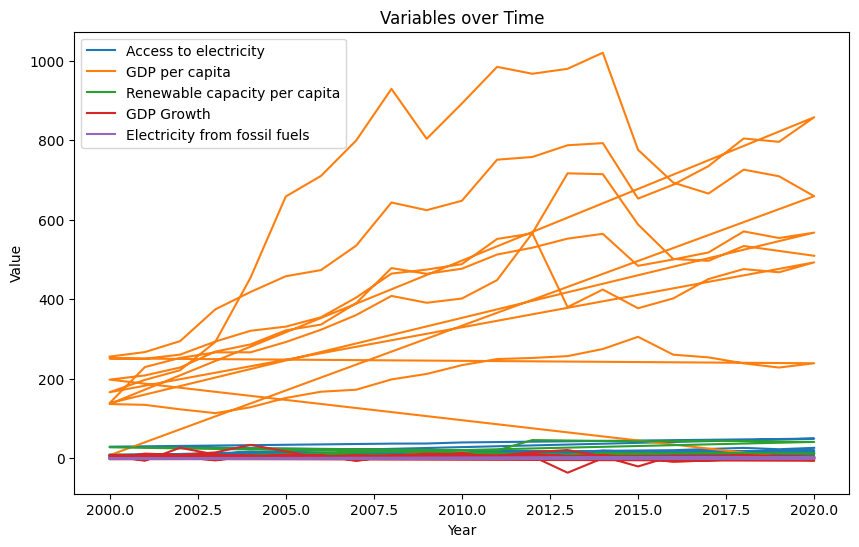

In [58]:
import matplotlib.pyplot as plt

# Example of plotting Access to electricity over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Access to electricity (% of population)'], label='Access to electricity')
plt.plot(df['Year'], df['gdp_per_capita'], label='GDP per capita')
plt.plot(df['Year'], df['Renewable-electricity-generating-capacity-per-capita'], label='Renewable capacity per capita')
plt.plot(df['Year'], df['gdp_growth'], label='GDP Growth')
plt.plot(df['Year'], df['Electricity from fossil fuels (TWh)'], label='Electricity from fossil fuels')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Variables over Time')
plt.legend()
plt.show()
